# Основные цели и задачи проекта

1.Провести первичную обработку данных. 
2.Оценить количество уникальных значений для номинативных переменных.
3.Провести корреляционный анализ количественных переменных.
4.Анализ номинативных переменных и устранение тех, которые не влияют на предсказываемую величину  (на переменную score).
5.Сформулировать выводы относительно качества данных и тех переменных, которые будут использоваться в дальнейшем построении модели.

# Описание датасета

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике


In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from scipy import stats
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.xls') # загружаем датасет

In [234]:
# посмотрим на данные и описание 
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [235]:
# теперь получим размеры датасета
stud_math.shape

(395, 30)

In [236]:
# Датасет содержит:

# 395 строк
# 30 признаков,score - целевой признак;
# 17 столбцов типа object
# 13 столбцов с числовыми признаками

In [237]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [238]:
# корректируем названия столбцов согласно PEP8
stud_math.columns = ['school', 'sex', 'age', 'address', 'family_size', 'parents_status', 'mother_edu', 'father_edu',
                    'mother_job', 'father_job', 'reason', 'guardian', 'travel_time', 'study_time',
                    'failures', 'school_support', 'fam_support', 'paid', 'activities', 'nursery',
                    'study_time_granular', 'higher', 'internet', 'romantic', 'family_relations',
                    'free_time', 'go_out', 'health', 'absences', 'score'
                   ]
display(stud_math)

,school,sex,age,address,family_size,parents_status,mother_edu,father_edu,mother_job,father_job,reason,guardian,travel_time,study_time,failures,school_support,fam_support,paid,activities,nursery,study_time_granular,higher,internet,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [239]:
# Функции для предобработки
# функция isNaN_column() для подсчета количества уникальных и пустых значений в столбце и замены пустых на None

def isNaN(num):
    return num != num


def isNaN_column(col):
    empty = len(col) - isNaN(col).value_counts()[False]
    print(' В столбце {}'.format(empty),
          'пустых значений и {} уникальных'.format(len(col.value_counts())))
    col = col.apply(lambda x: None if isNaN(x) else None if x == 'nan' else x)
    display(col.sort_values().unique(), col.sort_values().value_counts())
    return col

In [240]:
# Функция stat_column() для получения статистических данных

def stat_column(col):
    
    empty = len(col) - isNaN(col).value_counts()[False]
    perc25 = col.quantile(0.25)
    mediana = col.quantile(0.5)
    perc75 = col.quantile(0.75)
    IQR = perc75 - perc25
    left = perc25 - 1.5*IQR
    right = perc75 + 1.5*IQR
    
    print('25-й перцентиль: {},'.format(perc25),'Медина:{},'.format(mediana), '75-й перцентиль: {},'.format(perc75), 'IQR: {}, '.format(IQR),
          'Границы выбросов: [{l}, {r}]'.format(l=left, r=right),
          'Количество выбросов: {}.'.format(len(col) - len(col.loc[col.between(left, right)])-empty))

 В столбце 6 пустых значений и 18 уникальных


array([  0.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
        70.,  75.,  80.,  85.,  90.,  95., 100.,  nan])

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
20.0      1
100.0     1
Name: score, dtype: int64

25-й перцентиль: 40.0, Медина:55.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0] Количество выбросов: 0.


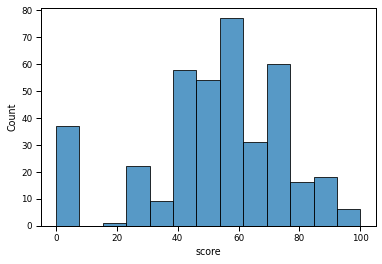

In [241]:
# Начнем с целевой переменной score
# Количественный признак, распределен нормально,большое количество нулевых значений.

stud_math.score = isNaN_column(stud_math.score)
sns.histplot(stud_math.score)
stat_column(stud_math.score)

 В столбце 0 пустых значений и 2 уникальных


array(['GP', 'MS'], dtype=object)

GP    349
MS     46
Name: school, dtype: int64

<AxesSubplot:xlabel='school', ylabel='Count'>

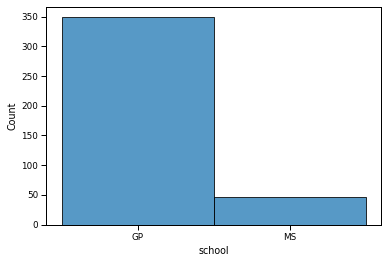

In [242]:
# school. Бинарный категориальный признак
# Пустых значений нет, 2 уникальных. Видим,что GP намного больше.чем MS 

stud_math.school = isNaN_column(stud_math.school)
sns.histplot(stud_math.school)

 В столбце 0 пустых значений и 2 уникальных


array(['F', 'M'], dtype=object)

F    208
M    187
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='Count'>

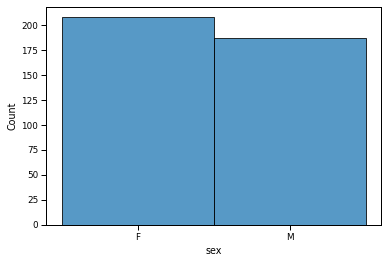

In [243]:
# sex. Бинарный категориальный признак
stud_math.sex = isNaN_column(stud_math.sex)
sns.histplot(stud_math.sex)

In [244]:
# age. Количественный признак без пропусков, 8 уникальных значений
stud_math.age = isNaN_column(stud_math.age)

 В столбце 0 пустых значений и 8 уникальных


array([15, 16, 17, 18, 19, 20, 21, 22], dtype=int64)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

25-й перцентиль: 16.0, Медина:17.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0] Количество выбросов: 1.


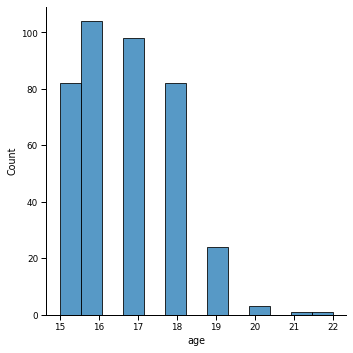

In [245]:
# age. Строим гистограмму и проверяем на выбросы
sns.displot(stud_math.age)
stud_math.age.describe()
stat_column(stud_math.age)

In [246]:
# age. Видим 1 выброс, убираем его
stud_math = stud_math.loc[stud_math.age <= 21]
# Для анализа значение возраста от 15 до 19 включительно, т.к. для 20 и 21 мало данных.

In [247]:
# address. 2 уникальных значения, 17 пустых.
stud_math.address = isNaN_column(stud_math.address)
# Оба уникальных значения встречаются в достаточном для анализа распределения оценки количестве
# Пустые строки можно удалить, а можно оставить None, т.к.это не повлият на наше исследование

 В столбце 17 пустых значений и 2 уникальных


array(['R', 'U', None], dtype=object)

U    294
R     83
Name: address, dtype: int64

In [248]:
# family_size. 2 уникальных значения, 27 пустых
stud_math.family_size = isNaN_column(stud_math.family_size)
# Видим, что маленьких семей гораздо меньше, но для анализа достаточно

 В столбце 27 пустых значений и 2 уникальных


array(['GT3', 'LE3', None], dtype=object)

GT3    260
LE3    107
Name: family_size, dtype: int64

In [249]:
# parents_status. 2 уникальных значения, 45 пустых. Для анализа хватает
stud_math.parents_status = isNaN_column(stud_math.parents_status)

 В столбце 45 пустых значений и 2 уникальных


array(['A', 'T', None], dtype=object)

T    313
A     36
Name: parents_status, dtype: int64

 В столбце 3 пустых значений и 5 уникальных


array([ 0.,  1.,  2.,  3.,  4., nan])

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
Name: mother_edu, dtype: int64

25-й перцентиль: 2.0, Медина:3.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


<AxesSubplot:xlabel='mother_edu'>

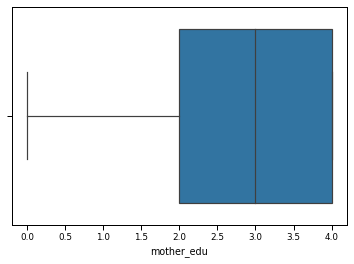

In [250]:
# mother_edu. Порядковый признак, 5 уникальных значений, 3 пустых
# Проверяем на наличие выбросов. Видим, что распределение сильно смещено вправо
stud_math.mother_edu = isNaN_column(stud_math.mother_edu)
stat_column(stud_math.mother_edu)
sns.boxplot(x='mother_edu', data = stud_math)

 В столбце 24 пустых значений и 6 уникальных


array([ 0.,  1.,  2.,  3.,  4., 40., nan])

2.0     106
3.0      96
4.0      88
1.0      77
0.0       2
40.0      1
Name: father_edu, dtype: int64

25-й перцентиль: 2.0, Медина:2.5, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5] Количество выбросов: 3.


<AxesSubplot:xlabel='father_edu'>

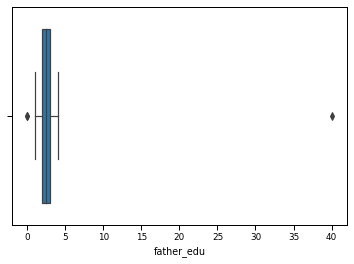

In [251]:
# father_edu. 6 уникальных значений, 24 пустых. 
stud_math.father_edu = isNaN_column(stud_math.father_edu)
# Проверяем на наличие выбросов.
stat_column(stud_math.father_edu)
sns.boxplot(x='father_edu', data = stud_math)

In [252]:
#В в этом столбце есть ошибка заполнения - указано значение 40. Вариант исправления - удалить или поменять на 4.0.
# исправляем ошибку ввода
stud_math.loc[stud_math.father_edu == 40.0, 'father_edu'] = 4.0

In [253]:
# заполняем пустые строки новым значением
stud_math.father_edu = stud_math.father_edu.fillna(stud_math.father_edu.median())

In [254]:
# проверяем все исправления
stud_math.father_edu = isNaN_column(stud_math.father_edu)

 В столбце 0 пустых значений и 6 уникальных


array([0. , 1. , 2. , 2.5, 3. , 4. ])

2.0    106
3.0     96
4.0     89
1.0     77
2.5     24
0.0      2
Name: father_edu, dtype: int64

<AxesSubplot:xlabel='father_edu'>

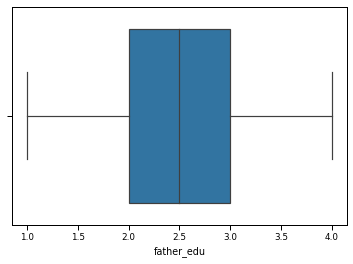

In [255]:
# father_edu. Убираем 3 выброса, оставляя при этом пустые, чтобы не терять данные в других столбцах
stud_math = stud_math.loc[stud_math.father_edu.between(0.5, 4.5) | isNaN(stud_math.father_edu)]
sns.boxplot(x='father_edu', data = stud_math)

In [256]:
# проверяем размер датасета
stud_math.shape

(392, 30)

In [257]:
# mother_job. Категориальный признак.
stud_math.mother_job = isNaN_column(stud_math.mother_job)

 В столбце 19 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

other       132
services     97
at_home      58
teacher      54
health       32
Name: mother_job, dtype: int64

In [258]:
# father_job.Категориальный признак.
stud_math.father_job = isNaN_column(stud_math.father_job)

 В столбце 36 пустых значений и 5 уникальных


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

other       195
services    101
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

In [259]:
# reason. Категориальный признак 
stud_math.reason = isNaN_column(stud_math.reason)

 В столбце 17 пустых значений и 4 уникальных


array(['course', 'home', 'other', 'reputation', None], dtype=object)

course        136
home          104
reputation    102
other          33
Name: reason, dtype: int64

In [260]:
# guardian.Категориальный.
stud_math.guardian = isNaN_column(stud_math.guardian)

 В столбце 31 пустых значений и 3 уникальных


array(['father', 'mother', 'other', None], dtype=object)

mother    247
father     86
other      28
Name: guardian, dtype: int64

 В столбце 28 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

1.0    241
2.0     94
3.0     22
4.0      7
Name: travel_time, dtype: int64

25-й перцентиль: 1.0, Медина:1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 7.


<AxesSubplot:xlabel='travel_time'>

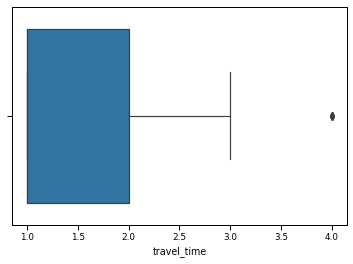

In [261]:
# travel_time. Порядковый признак, проверим на выбросы
stud_math.travel_time = isNaN_column(stud_math.travel_time)
stat_column(stud_math.travel_time)
sns.boxplot(x='travel_time', data = stud_math)

<AxesSubplot:xlabel='travel_time'>

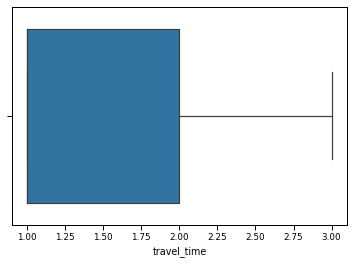

In [262]:
# travel_time. Убираем выбросы на значении 4, их все равно мало для анализа score
stud_math = stud_math.loc[stud_math.travel_time.between(-0.5, 3.5) | isNaN(stud_math.travel_time)]
sns.boxplot(x='travel_time', data = stud_math)

 В столбце 7 пустых значений и 4 уникальных


array([ 1.,  2.,  3.,  4., nan])

2.0    191
1.0     99
3.0     63
4.0     25
Name: study_time, dtype: int64

25-й перцентиль: 1.0, Медина:2.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5] Количество выбросов: 25.


<AxesSubplot:xlabel='study_time'>

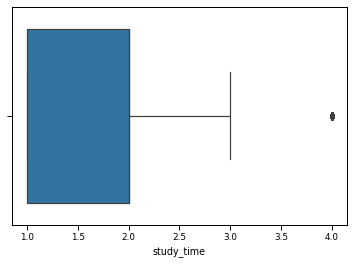

In [263]:
# study_time. Порядковый признак, проверяем на наличие выбросов
stud_math.study_time = isNaN_column(stud_math.study_time)
stat_column(stud_math.study_time)
sns.boxplot(x='study_time', data = stud_math)
# Выбросы оставим, т.к. это одно значение параметра в кол-ве, достаточном для анализа score

In [264]:
# Сравним столбец 'study_time_granular' со столбцом 'study_time'
display(pd.DataFrame(stud_math.study_time.value_counts()), pd.DataFrame(stud_math.study_time_granular.value_counts()))

,study_time
2.0,191
1.0,99
3.0,63
4.0,25


,study_time_granular
-6.0,191
-3.0,99
-9.0,63
-12.0,25


In [265]:
# Видим 100%-ную корреляцию. Убираем столбец 'study_time_granular', для анализа он не пригодится
stud_math.drop(['study_time_granular'], inplace = True, axis = 1)

 В столбце 20 пустых значений и 4 уникальных


array([ 0.,  1.,  2.,  3., nan])

0.0    288
1.0     49
2.0     16
3.0     12
Name: failures, dtype: int64

25-й перцентиль: 0.0, Медина:0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0] Количество выбросов: 77.


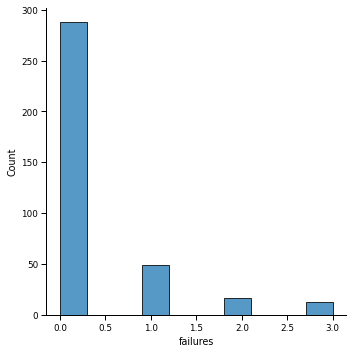

In [266]:
# failures. Распределение сильно смещено влево, так что выбросы оставим.
stud_math.failures = isNaN_column(stud_math.failures)
stat_column(stud_math.failures)
sns.displot(stud_math.failures)

In [267]:
# school_support.Бинарный категориальный признак. 
stud_math.school_support = isNaN_column(stud_math.school_support)

 В столбце 9 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     327
yes     49
Name: school_support, dtype: int64

In [268]:
# fam_support.Бинарный категориальный признак. 
stud_math.fam_support = isNaN_column(stud_math.fam_support)

 В столбце 36 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    216
no     133
Name: fam_support, dtype: int64

In [269]:
# paid.Бинарный категориальный признак. 
stud_math.paid = isNaN_column(stud_math.paid)

 В столбце 39 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     194
yes    152
Name: paid, dtype: int64

In [270]:
# activities.Бинарный категориальный признак. 
stud_math.activities = isNaN_column(stud_math.activities)

 В столбце 14 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    189
no     182
Name: activities, dtype: int64

In [271]:
# nursery.Бинарный категориальный признак. 
stud_math.nursery = isNaN_column(stud_math.nursery)

 В столбце 16 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    292
no      77
Name: nursery, dtype: int64

In [272]:
# higher.Бинарный категориальный признак. 
stud_math.higher = isNaN_column(stud_math.higher)

 В столбце 17 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    351
no      17
Name: higher, dtype: int64

In [273]:
# internet.Бинарный категориальный признак. 
stud_math.internet = isNaN_column(stud_math.internet)

 В столбце 34 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

yes    296
no      55
Name: internet, dtype: int64

In [274]:
# romantic.Бинарный категориальный признак. 
stud_math.romantic = isNaN_column(stud_math.romantic)

 В столбце 31 пустых значений и 2 уникальных


array(['no', 'yes', None], dtype=object)

no     236
yes    118
Name: romantic, dtype: int64

 В столбце 27 пустых значений и 6 уникальных


array([-1.,  1.,  2.,  3.,  4.,  5., nan])

 4.0    177
 5.0     96
 3.0     61
 2.0     17
 1.0      6
-1.0      1
Name: family_relations, dtype: int64

25-й перцентиль: 4.0, Медина:4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5] Количество выбросов: 24.


<AxesSubplot:xlabel='family_relations'>

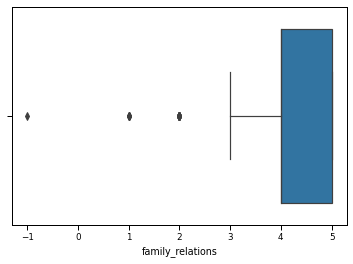

In [275]:
# family_relations. Порядковый признак, проверяем на наличие выбросов
stud_math.family_relations = isNaN_column(stud_math.family_relations)
stat_column(stud_math.family_relations)
sns.boxplot(x='family_relations', data = stud_math)

In [276]:
# family_relations. Находим 24 выброса, значение 2 имеет 17 результатов, оставляем их,а по значениям -1 и 1 уберем 7 
stud_math = stud_math.loc[stud_math.family_relations.between(2.0, 5.0) | isNaN(stud_math.family_relations)]

In [277]:
# прверяем размер датасета
stud_math.shape

(378, 29)

 В столбце 11 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    146
4.0    108
2.0     60
5.0     36
1.0     17
Name: free_time, dtype: int64

25-й перцентиль: 3.0, Медина:3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5] Количество выбросов: 17.


<AxesSubplot:xlabel='free_time'>

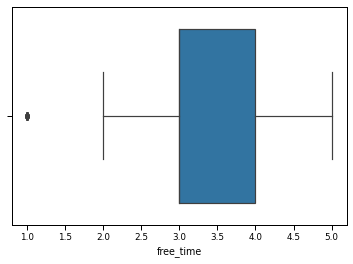

In [278]:
# free_time. Порядковый признак. Распределение нормальное, выбросы убирать не будем
stud_math.free_time = isNaN_column(stud_math.free_time)
stat_column(stud_math.free_time)
sns.boxplot(x='free_time', data = stud_math)

 В столбце 8 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

3.0    124
2.0     94
4.0     84
5.0     46
1.0     22
Name: go_out, dtype: int64

25-й перцентиль: 2.0, Медина:3.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0] Количество выбросов: 0.


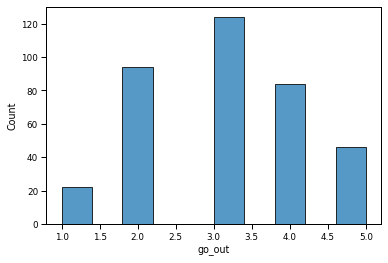

In [279]:
# go_out. Порядковый признак. Распределение нормальное, выбросов нет.
stud_math.go_out = isNaN_column(stud_math.go_out)
sns.histplot(stud_math.go_out)
stat_column(stud_math.go_out)

 В столбце 14 пустых значений и 5 уникальных


array([ 1.,  2.,  3.,  4.,  5., nan])

5.0    133
3.0     86
4.0     61
2.0     43
1.0     41
Name: health, dtype: int64

25-й перцентиль: 3.0, Медина:4.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0] Количество выбросов: 0.


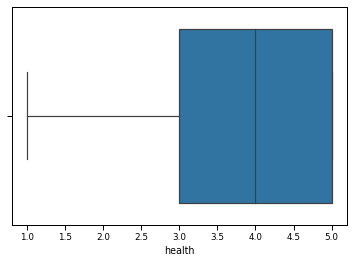

In [280]:
# health. Порядковый признак. Распределение нормальное со смещением вправо, выбросов нет
stud_math.health = isNaN_column(stud_math.health)
sns.boxplot(x='health', data = stud_math)
stat_column(stud_math.health)

 В столбце 12 пустых значений и 36 уникальных


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  28.,  30.,  38.,  40.,  54.,  56.,
        75., 212., 385.,  nan])

0.0      108
2.0       57
4.0       52
6.0       29
8.0       19
10.0      16
12.0      12
14.0       9
3.0        8
16.0       6
7.0        6
18.0       5
5.0        4
20.0       4
22.0       3
1.0        3
9.0        3
15.0       2
11.0       2
13.0       2
385.0      1
212.0      1
19.0       1
21.0       1
23.0       1
24.0       1
25.0       1
26.0       1
28.0       1
30.0       1
38.0       1
40.0       1
54.0       1
56.0       1
75.0       1
17.0       1
Name: absences, dtype: int64

25-й перцентиль: 0.0, Медина:4.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0] Количество выбросов: 17.


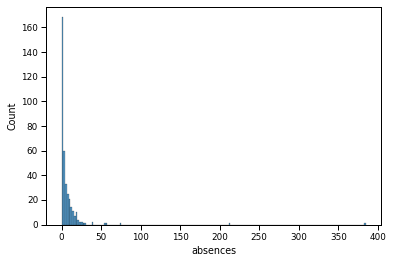

In [281]:
# absences. Количественный признак. Распределение нормальное, имеет малую дисперсию и длинный хвост справа.
stud_math.absences = isNaN_column(stud_math.absences)
sns.histplot(stud_math.absences)
stat_column(stud_math.absences)

<AxesSubplot:xlabel='absences', ylabel='Count'>

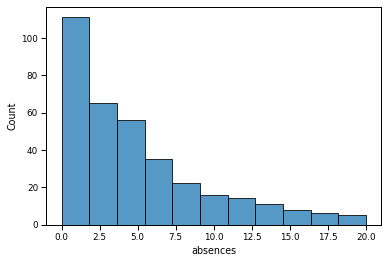

In [282]:
# absences. Убираем выбросы и смотрим на гистограмму
stud_math = stud_math.loc[stud_math.absences.between(0.0, 20.0) | isNaN(stud_math.absences)]
sns.histplot(stud_math.absences)

In [283]:
# Убрали 34 строки и один столбец из всего датасета
stud_math.shape

(361, 29)

In [284]:
 # Предобработка окончена, и переходим к отбору столбцов для построения модели формирования итоговой оценки

In [285]:
# Корреляционный анализ количественных переменных

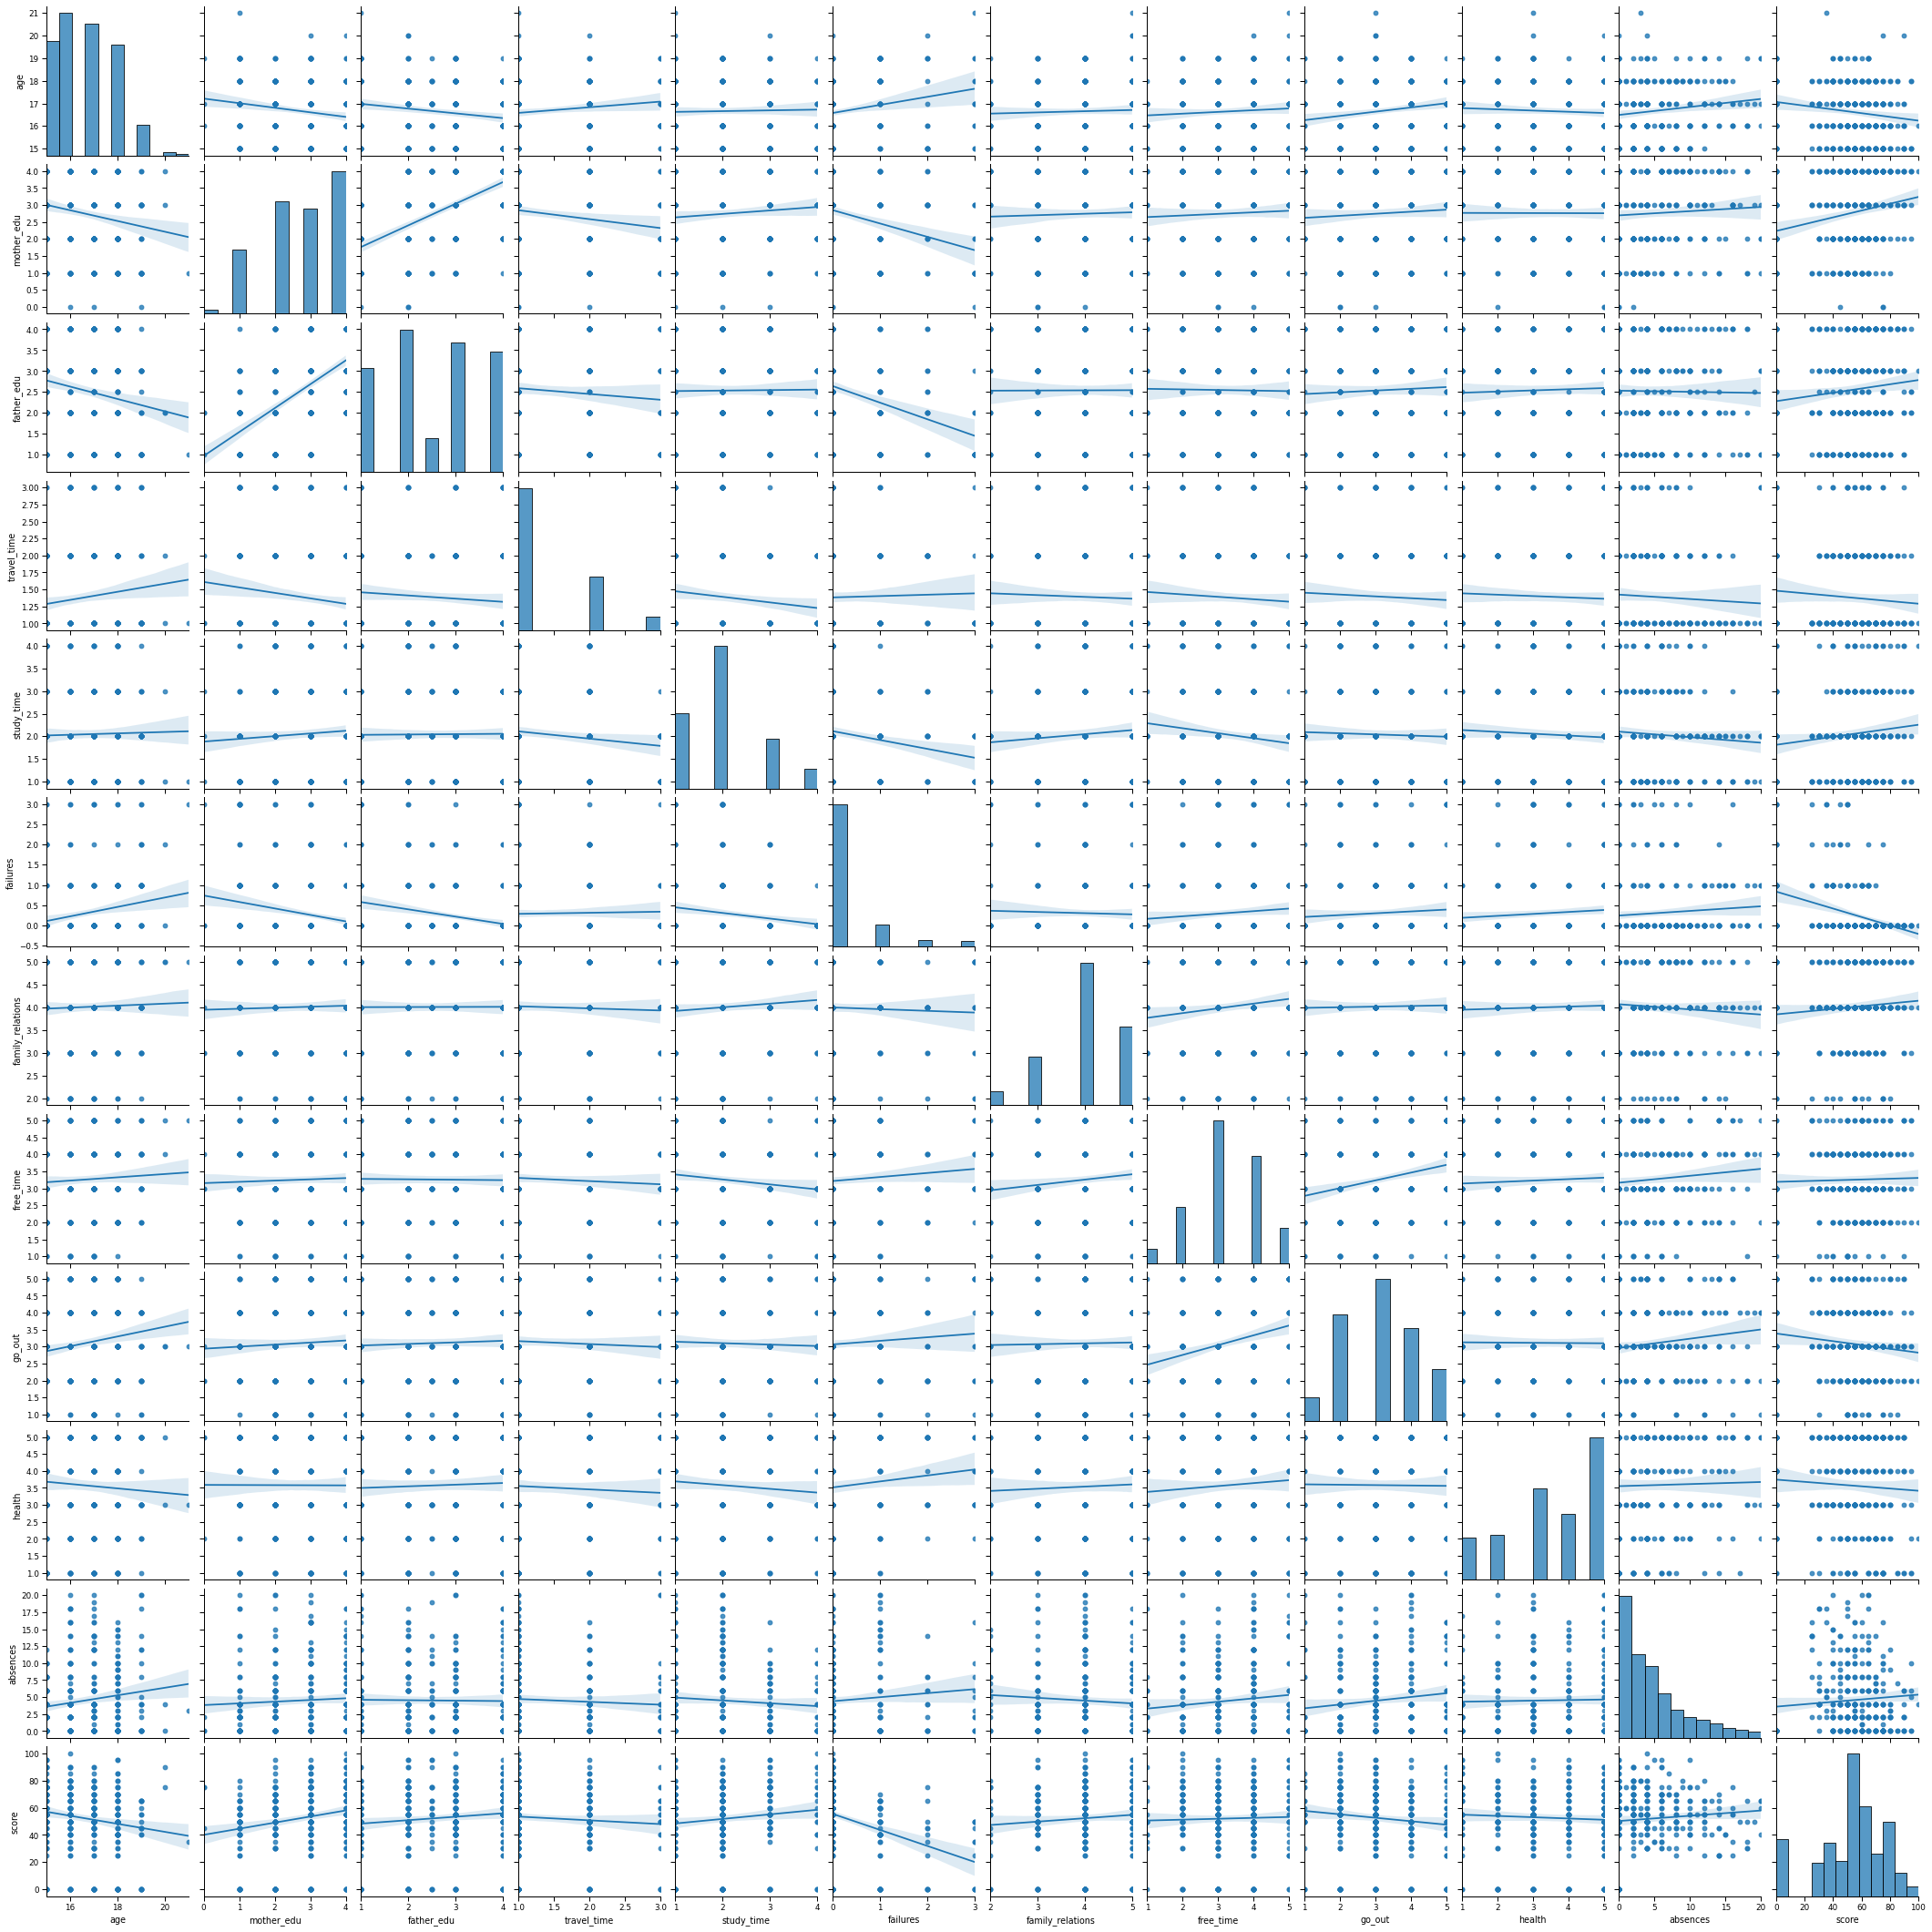

In [286]:
sns.pairplot(stud_math, kind = 'reg')

In [287]:
stud_math.corr()

,age,mother_edu,father_edu,travel_time,study_time,failures,family_relations,free_time,go_out,health,absences,score
age,1.000000,-0.178737,-0.176025,0.121931,0.022847,0.203677,0.034312,0.060867,0.164032,-0.059517,0.140330,-0.156144
mother_edu,-0.178737,1.000000,0.603574,-0.145491,0.078090,-0.250560,0.030945,0.041545,0.060395,-0.003025,0.055629,0.212017
father_edu,-0.176025,0.603574,1.000000,-0.080385,0.009507,-0.267173,0.003005,-0.013146,0.043947,0.036825,-0.013261,0.113070
travel_time,0.121931,-0.145491,-0.080385,1.000000,-0.114824,0.022952,-0.035029,-0.057925,-0.048269,-0.044907,-0.052119,-0.072667
study_time,0.022847,0.078090,0.009507,-0.114824,1.000000,-0.164801,0.085402,-0.127138,-0.032725,-0.066829,-0.071597,0.122035
failures,0.203677,-0.250560,-0.267173,0.022952,-0.164801,1.000000,-0.033453,0.086745,0.069240,0.092125,0.082163,-0.351306
family_relations,0.034312,0.030945,0.003005,-0.035029,0.085402,-0.033453,1.000000,0.128477,0.018658,0.038252,-0.068539,0.086734
free_time,0.060867,0.041545,-0.013146,-0.057925,-0.127138,0.086745,0.128477,1.000000,0.256963,0.061146,0.101348,0.027617
go_out,0.164032,0.060395,0.043947,-0.048269,-0.032725,0.069240,0.018658,0.256963,1.000000,-0.008939,0.123096,-0.119774
health,-0.059517,-0.003025,0.036825,-0.044907,-0.066829,0.092125,0.038252,0.061146,-0.008939,1.000000,0.022341,-0.055609


In [288]:
#Предварительные выводы по корреляционному анализу
#Признак failures  имеет хорошую корреляцию с образованием родителей (mother_edu, father_edu), а также еще более сильную корреляцию сo score.
#Также хорошую скоррелированность с результатами score показывают возраст(age), время на учёбу помимо школы(study_time) и проведенное времени с друзьями(go_out).

In [289]:
# Посмотрим, различаются ли распределения оценки в зависимости от значений категориальных или порядковых переменных
# Построим графики boxplot

def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

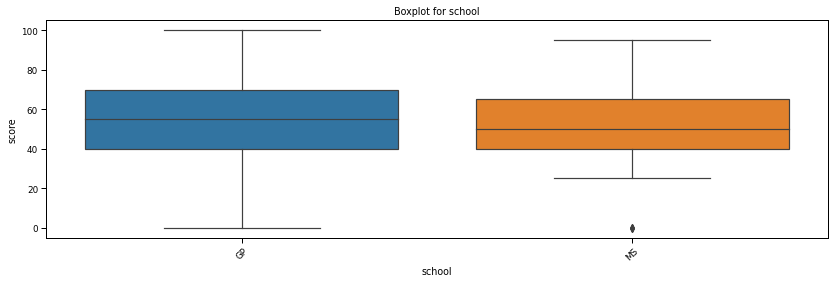

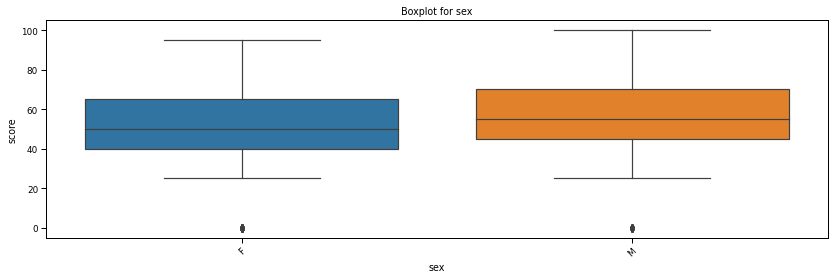

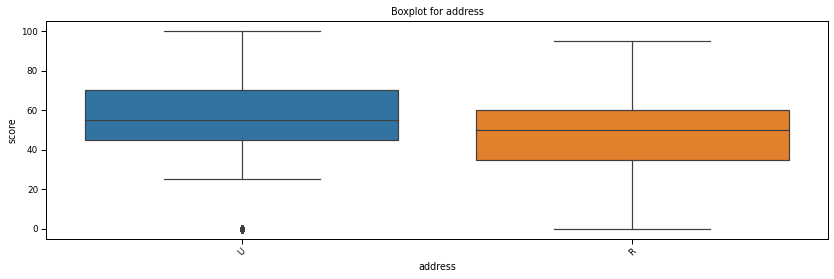

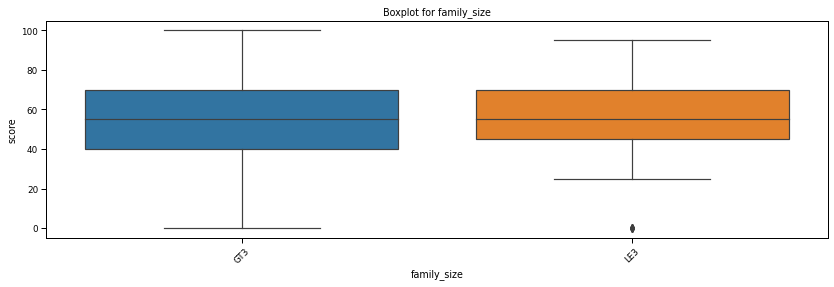

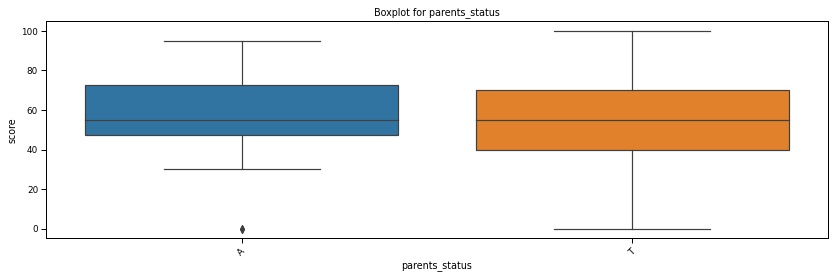

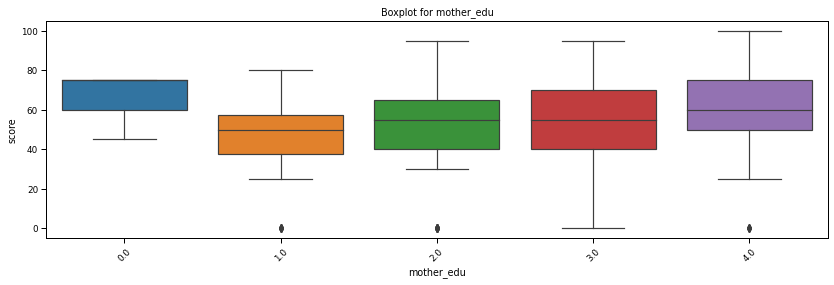

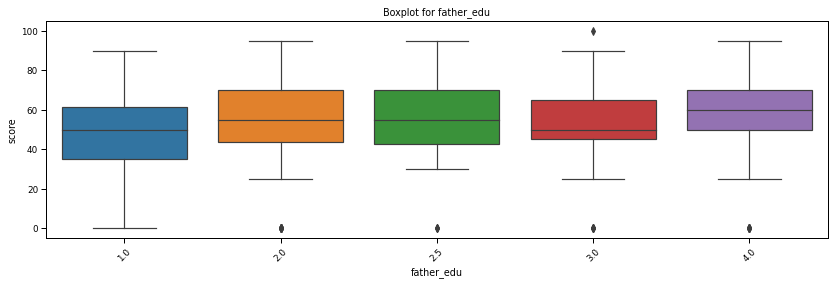

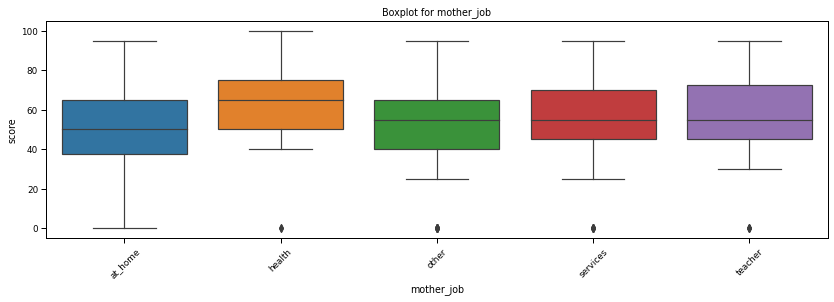

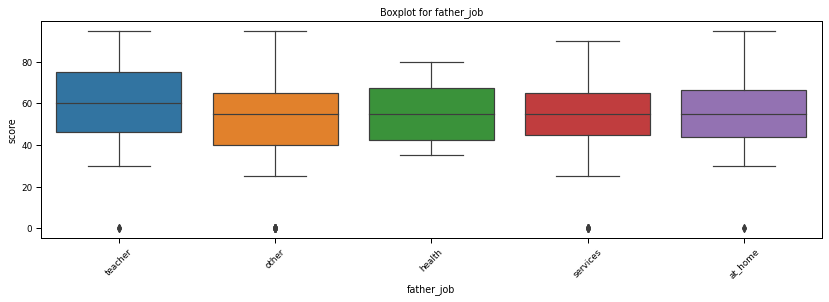

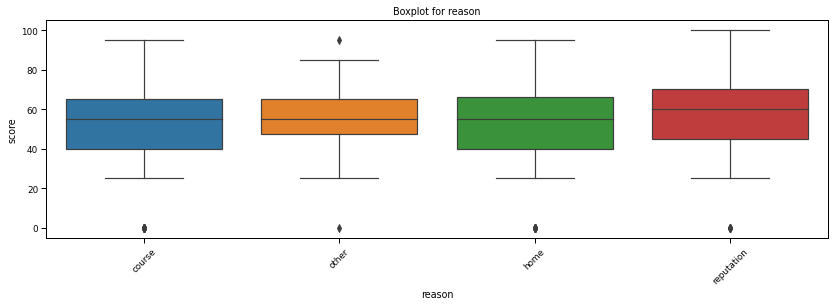

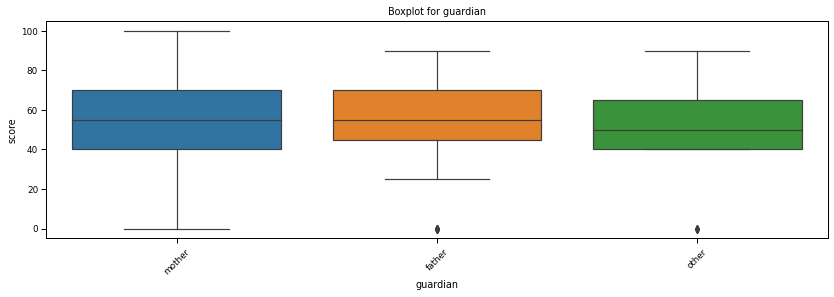

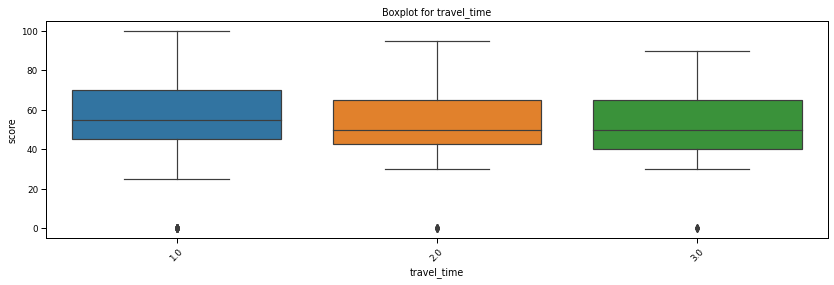

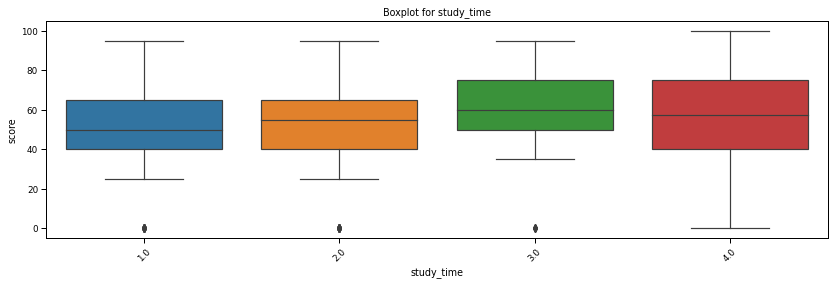

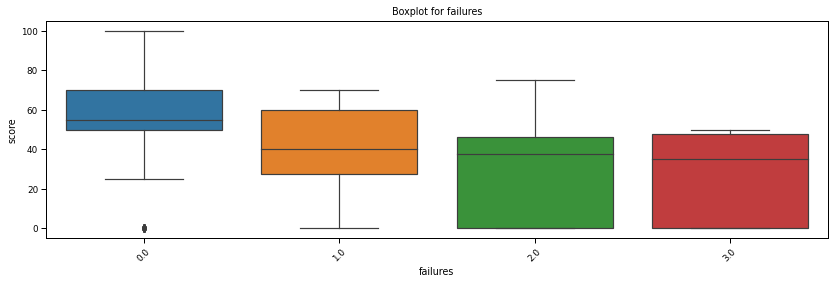

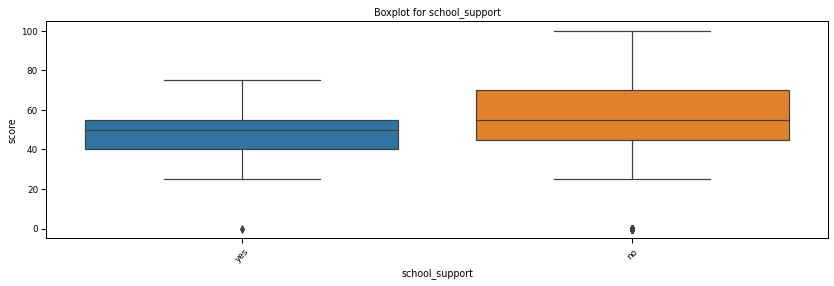

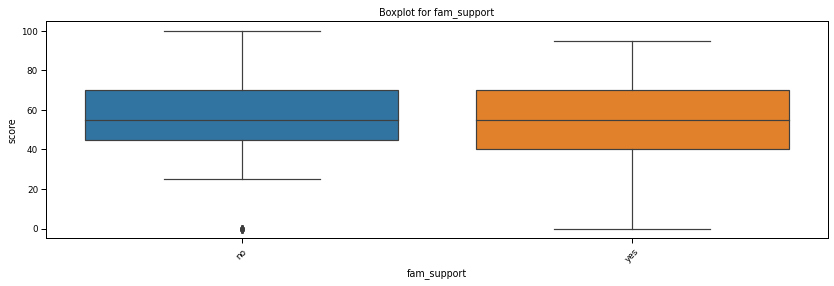

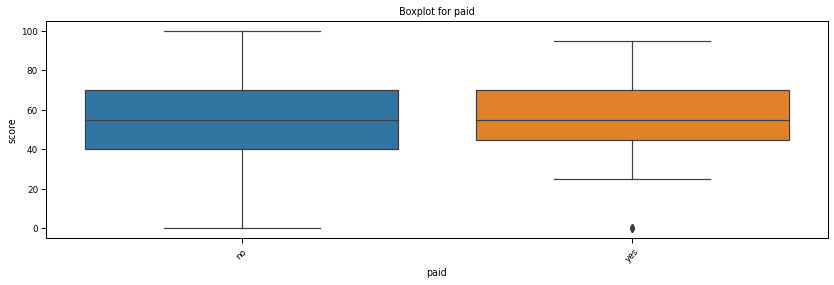

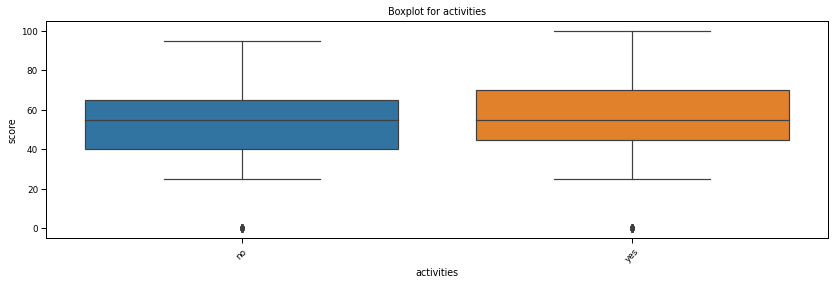

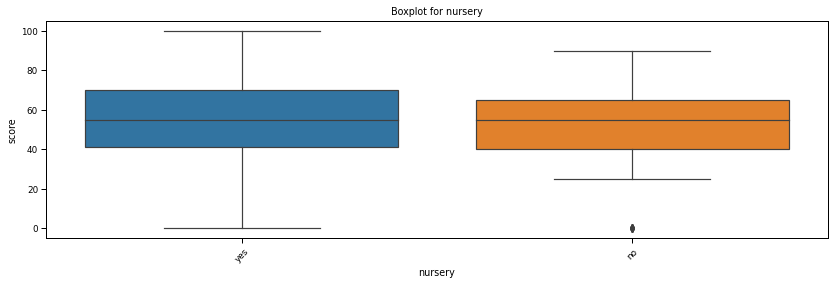

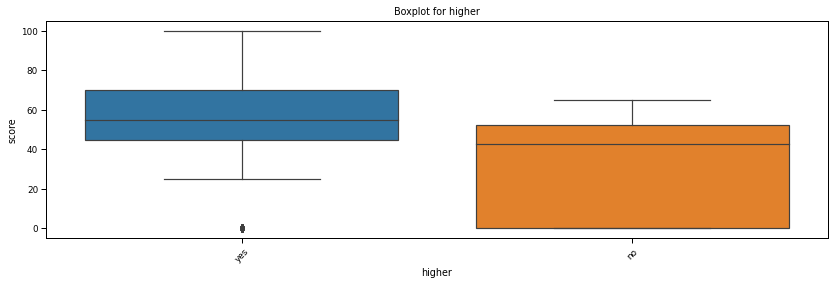

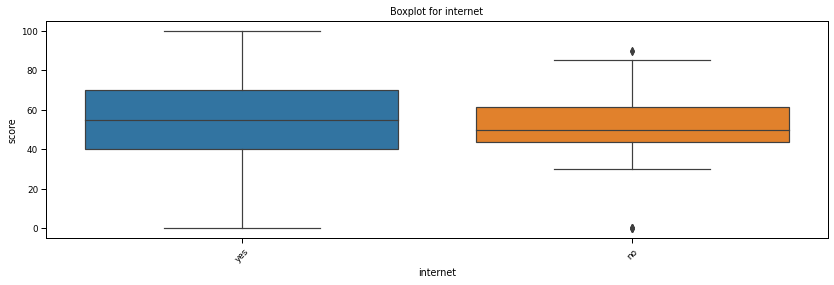

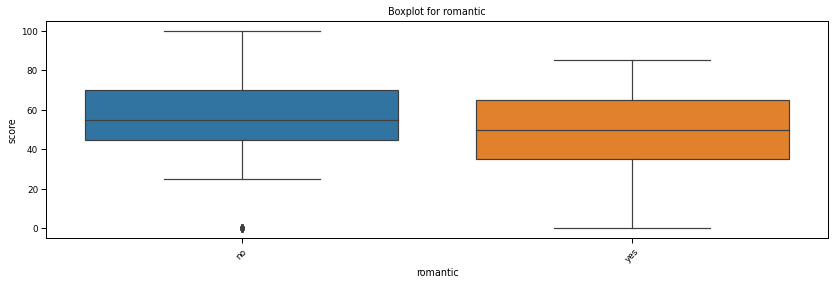

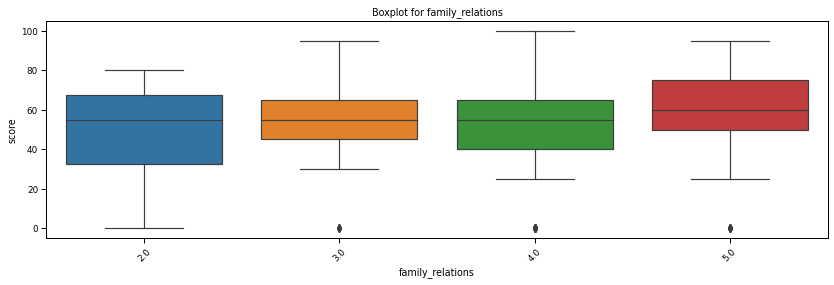

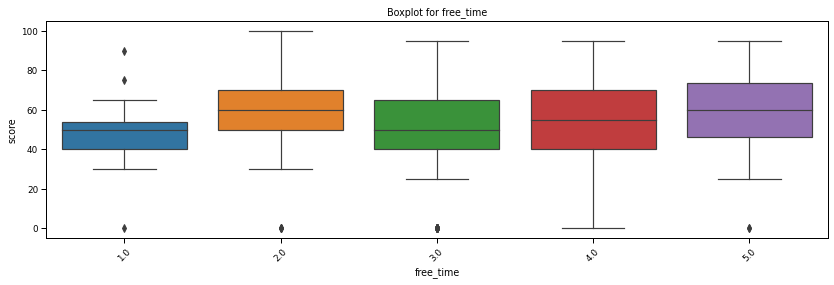

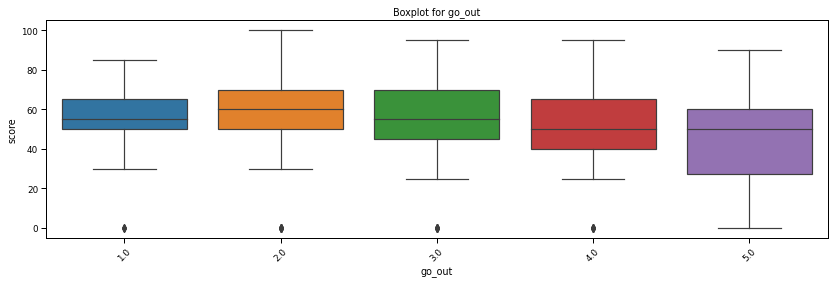

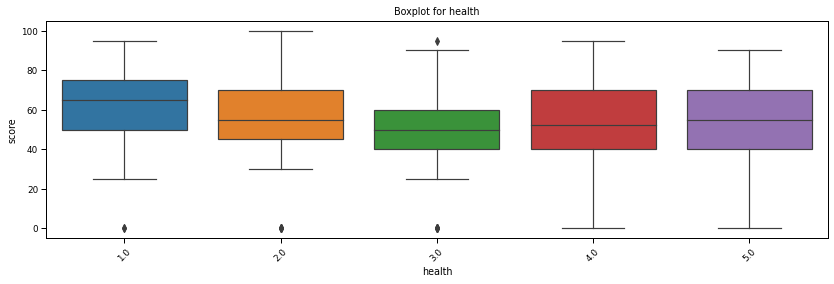

In [290]:
for column in stud_math:
    if column in ['age', 'absences', 'score']:
        continue
    else:
        get_boxplot(column)

In [291]:
# Теперь проверяем существенны ли изменения с помощью теста Стьюдента

def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score'], nan_policy='omit').pvalue \
            <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [292]:
for column in stud_math:
    if column in ['age','absences','score']:
        continue
    else:
        get_stat_dif(column)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_edu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [295]:
# существенные для итоговой оценки различия есть только в 7 столбцах. Теперь сформируем итоговые данные, которые мы будем использовать для построения модели.
stud_math_for_model = stud_math.loc[:, ['score','sex', 'address', 'mother_edu',  'failures', 'higher', 'romantic', 'age', 'absences', 'go_out','study_time',]]
stud_math_for_model.head()

,score,sex,address,mother_edu,failures,higher,romantic,age,absences,go_out,study_time
0,30.0,F,U,4.0,0.0,yes,no,18,6.0,4.0,2.0
1,30.0,F,U,1.0,0.0,yes,no,17,4.0,3.0,2.0
2,50.0,F,U,1.0,3.0,yes,None,15,10.0,2.0,2.0
3,75.0,F,U,4.0,0.0,yes,yes,15,2.0,2.0,3.0
4,50.0,F,U,3.0,0.0,yes,no,16,4.0,2.0,2.0


In [294]:
# ИТОГИ
# В результате EDA для анализа влияния условий жизни учеников на итоговые оценки по математике мы пришли к следующим выводам:

# Данные достаточно полные, небольшое количество пустых значений на признак.

# Выбросов удалено 34 в 5ти признаках, больше всего было в признаке absences(17).
# Признак failures  имеет хорошую корреляцию с образованием родителей (mother_edu, father_edu), а также еще более сильную корреляцию сo score.

#Также хорошую скоррелированность с результатами score показывают возраст(age), время на учёбу помимо школы(study_time) и проведенное времени с друзьями(go_out).

# Определены самые важные параметры, которые будем использовать в дальнейшем для построения модели